# Workshop - CNNs: Classification clothing images

# Import libraries:

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras:
import tensorflow as tf
from tensorflow import keras

# Helper libraries:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Initializing other libraries:

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
from keras_preprocessing.image import img_to_array, array_to_img
from keras.applications import VGG16
from keras import models, layers

# Import the Fashion MNIST dataset:

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. 

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. 


The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>



## Download Data:

In [2]:
# Loading the dataset and spliting in train and test segments:

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
# Checking the shape of the splited dataset:

train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [4]:
# Storing the dataset in order to be used later for plotting:

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
# Checking the results:

class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

## Explore the data:
60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [6]:
# Checking the shape of the train_images segment:

train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [7]:
# Checking the lenght of the train_labels segment:

len(train_labels)

60000

Each label is an integer between 0 and 9:

In [8]:
# Printing the labels of the train_labels segment:

train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [9]:
# Checking the shape of the test_images segment:

test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [10]:
# Printing the labels of the test_labels segment:

len(test_labels)

10000

## Preprocess the data:

The data must be preprocessed before training the network. Plot the first image in the training set.

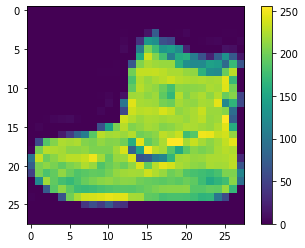

In [11]:
# Visualizing the first image of train_images segment with colorbar:

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Scaling:
Scale these values to a range of 0 to 1 before feeding them to the neural network model (divide the values by 255)

Do the same for the train and the test set


In [12]:
# Normalize the dataset as preparation for CNN model:

# Changing the type of the instances:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Dividing in order to obtain range of values between 0 and 1:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [13]:
# Test the normalized dataset:

train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Display the first 25 images from the *training set* and display the class name above/below each image.

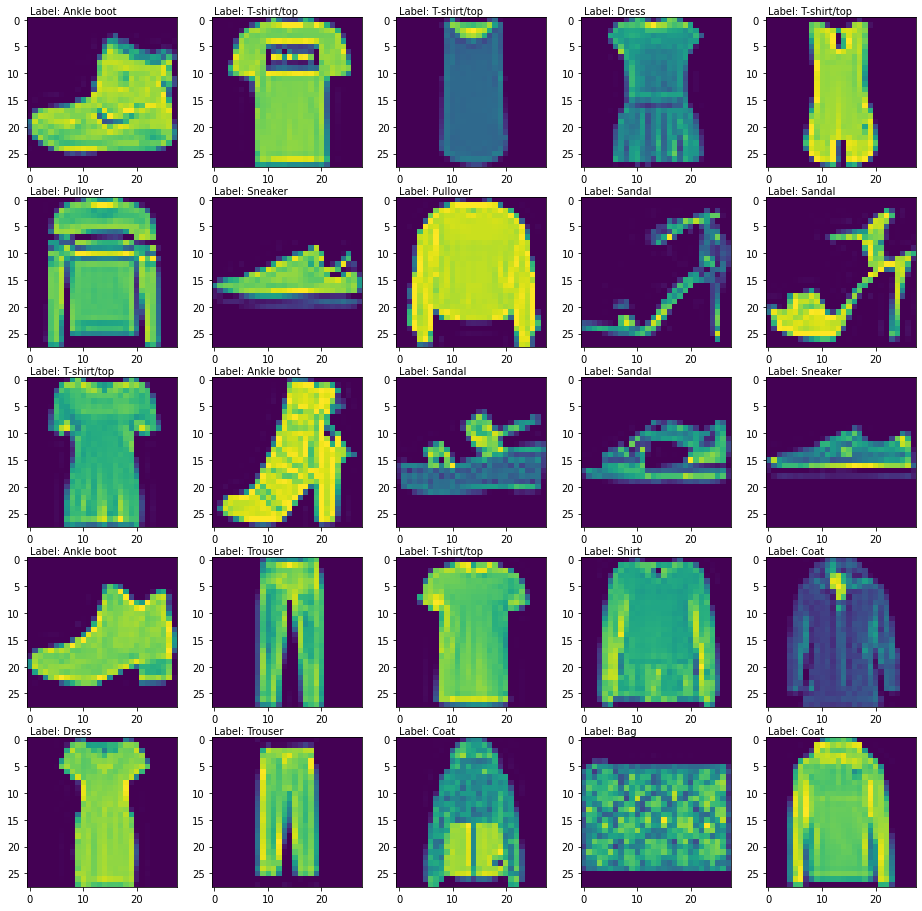

In [14]:
# Visualizing the first 25 images from the dataset:

fig = plt.figure(figsize = (16, 16))

for i in range(5 * 5):
    ax1 = fig.add_subplot(5, 5, i+1)
    ax1.imshow(train_images[i])
    title = "Label: " + str(class_names[train_labels[i]])
    ax1.text(0, -1, title, size = 10)

plt.show()

## Build the model:

Building the neural network requires configuring the layers of the model, then compiling the model.

### Reshaping the input data to adapt to the CNN layers in Keras:

- for example: train_images.reshape(60000, 28, 28, 1)

Do the same for the test data

In [15]:
# Reshaping the input data to adapt to the CNN layers in Keras:
 
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

In [16]:
# Checking the results after reshape:

train_images.shape, test_images.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

### Set up the layers:

Use:

- The first layer is a 2D Convolution with RELU activation function, kernel size 3x3, and 32 kernels/filters.
- The second layer is a 2D Convolution with RELU activation function, kernel size 3x3, and 64 kernels/filters. 
- It is followed by a MaxPooling layer with size 2x2. 
- Then there is a dropout layer with rate - 25% - chance of dropout.
- Next layer is a Flatten layer that transforms output of the previous layer (from a two-dimensional array) to a one-dimensional array. 
- After the pixels are flattened, the network consists of a sequence of two Dense layers. 
  - The first Dense layer has 128 nodes (or neurons). 
  - The second (and last) layer is a 10-node softmax layer that returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

In [17]:
# Create CNN model object:

# Creating the Sequential model:
model = Sequential()

# Setting first layer with model parameters:
model.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = (28, 28, 1), padding = 'same', activation = 'relu', strides = (1, 1)))

# Setting second layer:
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same'))

# Inserting pooling layer:
model.add(MaxPooling2D(pool_size = (2, 2)))

# Adding dropout layer:
model.add(Dropout(0.25))

# Inserting flatten layer:
model.add(Flatten())

# Inserting dense layer:
model.add(Dense(128, activation = 'relu'))

# Final layer:
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1605760   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

### Compile the model:

* *Loss function* —sparse_categorical_crossentropy
* *Optimizer* —adam
* *Metrics* —accuracy

In [18]:
# Compiling the CNN model:

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [19]:
# Setting the model:

path = 'best_model_first.pt'

# ModelCheckpoint monitoring:
callback_1 = ModelCheckpoint(path, monitor = 'val_accuracy', save_best_only = True, mode = 'max', verbose = 1)

## Train the model:

- validation_data=(test_images, test_labels)
- epochs=10 
- batch_size=64

In [20]:
# Training the model:

val_data = (test_images, test_labels)

train_history = model.fit(train_images, 
                          train_labels, 
                          validation_data = val_data, 
                          epochs = 10, 
                          batch_size = 64,
                          callbacks = callback_1)

print('Training Finished')

Epoch 1/10
938/938 [==============================] - 6s 5ms/step - loss: 0.5197 - accuracy: 0.8124 - val_loss: 0.2899 - val_accuracy: 0.8956

Epoch 00001: val_accuracy improved from -inf to 0.89560, saving model to best_model_first.pt
INFO:tensorflow:Assets written to: best_model_first.pt/assets
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2482 - accuracy: 0.9100 - val_loss: 0.2472 - val_accuracy: 0.9080

Epoch 00002: val_accuracy improved from 0.89560 to 0.90800, saving model to best_model_first.pt
INFO:tensorflow:Assets written to: best_model_first.pt/assets
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1906 - accuracy: 0.9296 - val_loss: 0.2269 - val_accuracy: 0.9199

Epoch 00003: val_accuracy improved from 0.90800 to 0.91990, saving model to best_model_first.pt
INFO:tensorflow:Assets written to: best_model_first.pt/assets
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1590 - accuracy: 0.9412 

## Evaluate accuracy:

Next, compare how the model performs on the test dataset:

In [21]:
# Loading the best model 'best_model_first.pt':

m1 = load_model('/content/best_model_first.pt')

In [22]:
# Final evaluation of the model:

score = m1.evaluate(test_images, test_labels, verbose = 0)

print('Accuracy: %.2f%%' % (score[1]*100))

Accuracy: 93.01%


## Make predictions:

With the model trained, you can use it to make predictions about some images.

In [23]:
# Making predictions with the model:

predictions = m1.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [24]:
# Checking prediction:

predictions[0]

array([1.0010449e-09, 2.7187161e-12, 8.8391072e-11, 2.6696459e-13,
       2.8523692e-13, 3.5616119e-09, 9.7473425e-11, 1.6187022e-07,
       1.5063162e-09, 9.9999988e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [25]:
# Checking predictions with argmax:

print('Prediction for 0th image is: ', np.argmax(predictions[0]))

Prediction for 0th image is:  9


So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

In [26]:
# Recheking with the test_labels:

print('Actual label for 0th image is: ', test_labels[0])

Actual label for 0th image is:  9


## Functions to visualize the full set of 10 class predictions:

In [27]:
def plot_image(i, predictions_array, true_label, img):
  #img = img.reshape(train_images.shape[0], 28, 28)
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  img = img.reshape(28, 28)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

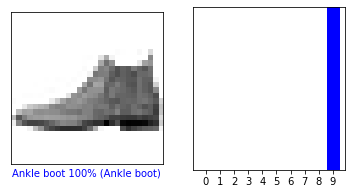

In [28]:
# Visualizing the prediction with prediction array:

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Using the same visualization technique, show the 17th image and its prediction.

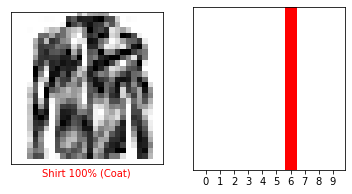

In [29]:
# Visualizing the prediction for image 17 with prediction array:

i = 17
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

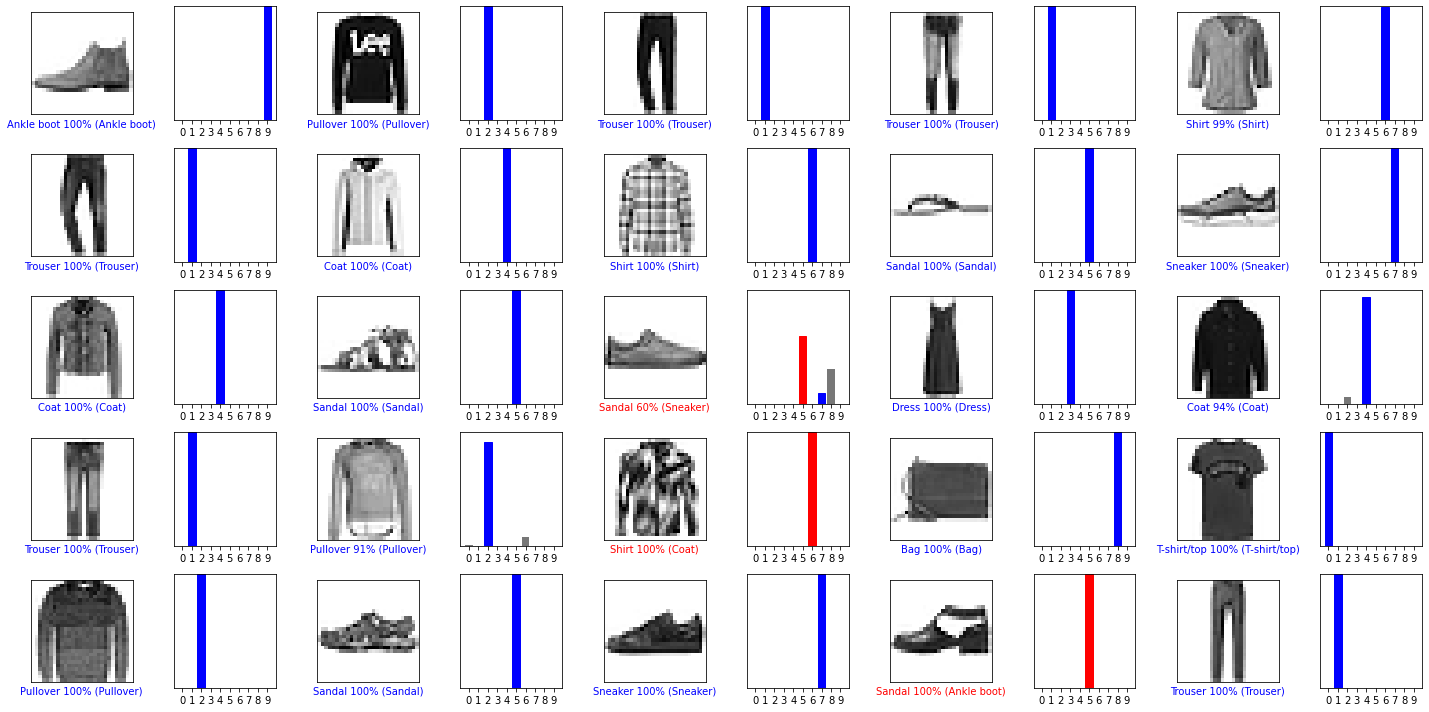

In [30]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [31]:
# For checking purposes call class_names:

for idx, val in enumerate(class_names):
    print(idx, val)

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot


**How many mistakes did the model make? For each mistake, what was the correct class and what was the prediction?**


## Summry on mistakes:

- 1) First mistake model pointed that is Sandal with 60% confidence, however on the image is shown Sneaker. Also, we see presents of Bag as outcome.

- 2) Second mistake model pointed that is Shirt with 100% confidence, however on the image is Coat.

- 3) Finally it made mistake with the Aknle boot where it pointed that is a Sandal with 100% confidence, which is incorrect. 


Finally, use the trained model to make a prediction about a single image.

In [32]:
# Grab an image from the test dataset:

img = test_images[1]

print(img.shape)

(28, 28, 1)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [33]:
# Add the image to a batch where it's the only member:

img = (np.expand_dims(img, 0))

print(img.shape)

(1, 28, 28, 1)


Now predict the correct label for this image:

In [34]:
# Prediction for a single image:

predictions_single = model.predict(img)

print(predictions_single)

[[1.4046753e-05 5.3315926e-15 9.9998593e-01 1.3661789e-13 7.4601124e-11
  1.7335249e-15 6.0398474e-12 3.4330652e-14 1.8451277e-18 1.1765101e-16]]


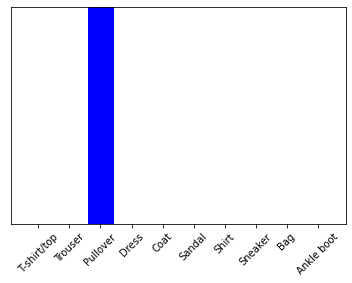

In [35]:
# Visualization for that signle image:

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

plt.show()

`model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [36]:
# Using argmax on the signle image:

for idx, val in enumerate(class_names):
    if idx == np.argmax(predictions_single[0]):
      print(idx, val)

2 Pullover


And the model predicts a label as expected.

In [37]:
# Comparing with the test_labels:

test_labels[1], class_names[test_labels[1]]

(2, 'Pullover')

# Second Model:

Create a model with 3 CNN layers.

- The first layer is a 2D Convolution with RELU activation function, kernel size 2x2, and 32 kernels/filters.
- The second layer is a 2D Convolution with RELU activation function, kernel size 3x3, and 32 kernels/filters. It is followed by a MaxPooling layer with size 2x2. Then there is a dropout layer with rate - 25% - chance of dropout.
- The third layer is a 2D Convolution with RELU activation function, kernel size 3x3, and 32 kernels/filters. It is followed by a MaxPooling layer with size 2x2. Then there is a dropout layer with rate - 35% - chance of dropout.

The final layers, are: Flatten layer; then Dense layer with 128 nodes; then 10-node softmax layer.

In [38]:
# Create CNN model object:

# Creating the Sequential model:
model2 = Sequential()

# Setting first layer with model parameters:
model2.add(Conv2D(filters = 32, kernel_size = (2, 2), input_shape = (28, 28, 1), padding = 'same', activation = 'relu', strides = (1, 1)))

# Setting second layer:
model2.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'same'))

# Inserting pooling layer:
model2.add(MaxPooling2D(pool_size = (2, 2)))

# Adding dropout layer:
model2.add(Dropout(0.25))

# Setting third layer:
model2.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'same'))

# Inserting pooling layer:
model2.add(MaxPooling2D(pool_size = (2, 2)))

# Adding dropout layer:
model2.add(Dropout(0.35))

# Inserting flatten layer:
model2.add(Flatten())

# Inserting dense layer:
model2.add(Dense(128, activation = 'relu'))

# Final layer:
model2.add(Dense(10, activation = 'softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        160       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 32)         

Compile the model with (optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

sgd: 
- 0.02 learning_rate
- decay = learning_rate/10, 
- momentum = 0.91

In [39]:
# Compiling the model:

epochs_m = 10
learning_rate_m = 0.02
decay_m = learning_rate_m / epochs_m
sgd = SGD(learning_rate  = learning_rate_m, momentum = 0.91, decay = decay_m)
model2.compile(loss = 'sparse_categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])

In [40]:
# Setting the model:

path = 'best_model_second.pt'

# ModelCheckpoint monitoring:
callback_1 = ModelCheckpoint(path, monitor = 'val_accuracy', save_best_only = True, mode = 'max', verbose = 1)

Train the model with 10 epochs

In [41]:
# Training the model:

val_data = (test_images, test_labels)

train_history2 = model2.fit(train_images, 
                          train_labels, 
                          validation_data = val_data, 
                          epochs = 10, 
                          batch_size = 64,
                          callbacks = callback_1)

print('Training Finished')

Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 0.9346 - accuracy: 0.6576 - val_loss: 0.3871 - val_accuracy: 0.8598

Epoch 00001: val_accuracy improved from -inf to 0.85980, saving model to best_model_second.pt
INFO:tensorflow:Assets written to: best_model_second.pt/assets
Epoch 2/10
938/938 [==============================] - 3s 4ms/step - loss: 0.4033 - accuracy: 0.8548 - val_loss: 0.3447 - val_accuracy: 0.8762

Epoch 00002: val_accuracy improved from 0.85980 to 0.87620, saving model to best_model_second.pt
INFO:tensorflow:Assets written to: best_model_second.pt/assets
Epoch 3/10
938/938 [==============================] - 3s 4ms/step - loss: 0.3645 - accuracy: 0.8676 - val_loss: 0.3194 - val_accuracy: 0.8823

Epoch 00003: val_accuracy improved from 0.87620 to 0.88230, saving model to best_model_second.pt
INFO:tensorflow:Assets written to: best_model_second.pt/assets
Epoch 4/10
938/938 [==============================] - 3s 4ms/step - loss: 0.3381 - accuracy: 0

Evaluate the model and print the accuracy on the test set

In [42]:
# Loading the best model 'best_model_second.pt':

m2 = load_model('/content/best_model_second.pt')

In [43]:
# Final evaluation of the model:

score = m2.evaluate(test_images, test_labels, verbose = 0)

print('Accuracy: %.2f%%' % (score[1]*100))

Accuracy: 90.10%


In [44]:
# Making predictions with the model:

predictions2 = m2.predict(test_images)

Show the predictions for image 10... and also print the test label... compare them

In [45]:
print('Prediction for 10th image is: ', np.argmax(predictions2[9]))

Prediction for 10th image is:  7


In [46]:
print('Actual label for 10th image is: ', test_labels[9])

Actual label for 10th image is:  7


Plot the prediction for image 17 (show the image, the predicted class and the percentage in a bar chart)

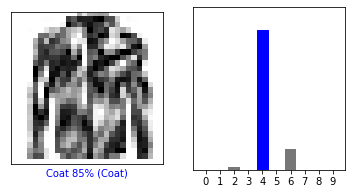

In [47]:
# Visualizing the prediction for image 17 with prediction array:

i = 17
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions2[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions2[i],  test_labels)
plt.show()

Plot the first 25 test images (5x5), their predicted labels, and the true labels.
Color correct predictions in blue and incorrect predictions in red.

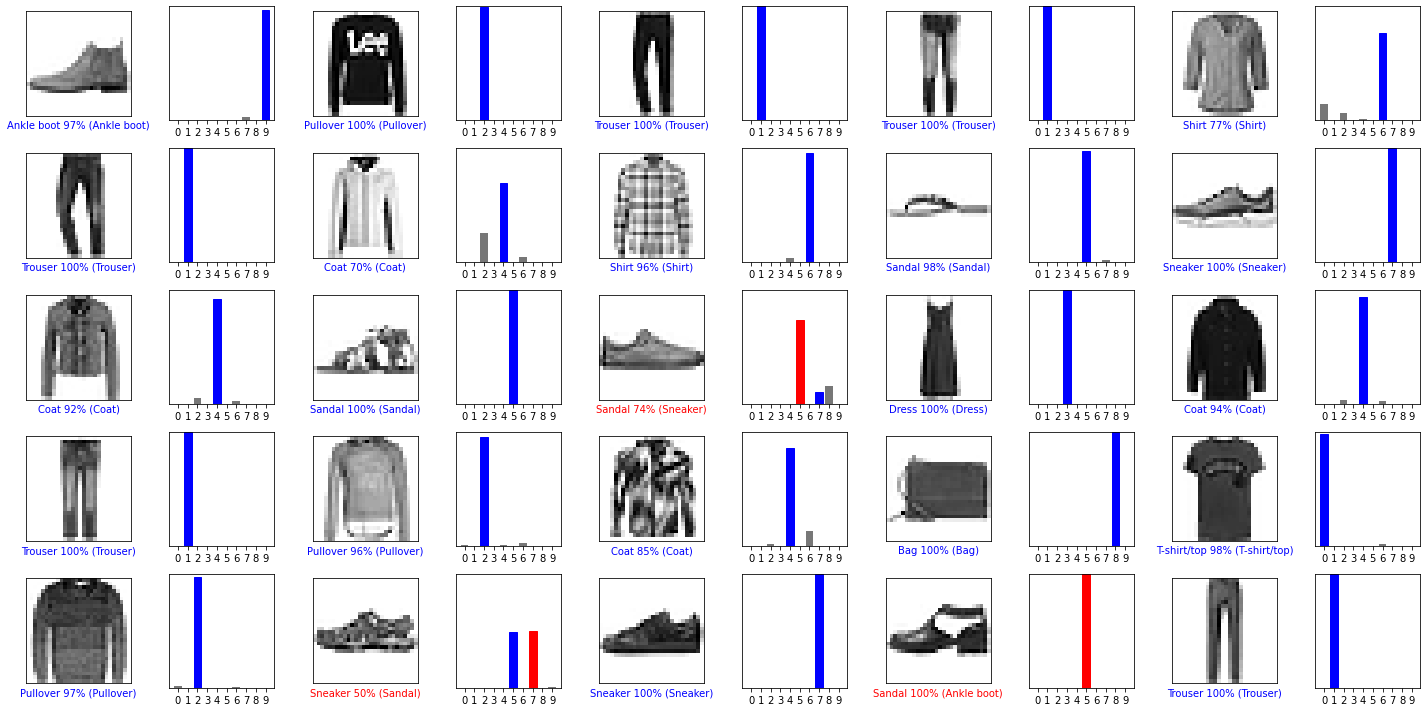

In [48]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions2[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions2[i], test_labels)
plt.tight_layout()
plt.show()

Use the model to predict the class for image 20 from the test set. Present the predictions for each class, and print the test label

In [49]:
# Grab an image from the test dataset:

img2 = test_images[19]

print(img2.shape)

(28, 28, 1)


In [50]:
# Add the image to a batch where it's the only member:

img2 = (np.expand_dims(img2, 0))

print(img2.shape)

(1, 28, 28, 1)


In [51]:
# Prediction for a single image:

pred_19 = m2.predict(img2)

print(pred_19)

[[9.7864795e-01 2.6672744e-06 3.3164109e-04 2.3244158e-04 1.2837438e-06
  8.0565300e-08 2.0778384e-02 1.6703178e-08 5.5335827e-06 9.7980202e-09]]


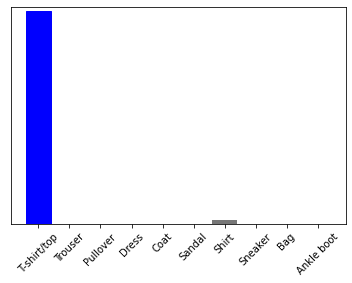

In [52]:
# Visualization for that signle image:

plot_value_array(19, pred_19[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

plt.show()

In [53]:
# Using argmax on the signle image:

for idx, val in enumerate(class_names):
    if idx == np.argmax(pred_19[0]):
      print(idx, val)

0 T-shirt/top


In [54]:
# Comparing with the test_labels:

test_labels[19], class_names[test_labels[19]]

(0, 'T-shirt/top')

Plot a confusion matrix

In [55]:
# Defining function for Confusion Martix and Classification Report:

def print_classification_report(true_y, pred_y, lab_names):
  cm = confusion_matrix(true_y, pred_y)
  print('Confusion matrix')
  print(cm)
  cr = classification_report(true_y, pred_y, target_names = lab_names)
  print()
  print(cr)

In [56]:
# Evaluating 'best_model_second.pt':

print('=====Evaluation Best_Model_Second.pt=====')
print_classification_report(test_labels, np.argmax(predictions2, axis = 1), class_names)

=====Evaluation Best_Model_Second.pt=====
Confusion matrix
[[843   1  16  26   3   1 100   0  10   0]
 [  1 977   0  15   3   0   2   0   2   0]
 [ 14   1 849  10  66   0  60   0   0   0]
 [ 12   5   7 918  27   0  28   0   3   0]
 [  0   1  62  29 842   0  65   0   1   0]
 [  0   0   0   0   0 973   0  20   0   7]
 [114   3  72  35  69   0 700   0   7   0]
 [  0   0   0   0   0   6   0 966   1  27]
 [  1   1   1   4   5   1   2   4 981   0]
 [  0   0   0   0   0   4   1  34   0 961]]

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.84      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.84      0.85      0.85      1000
       Dress       0.89      0.92      0.90      1000
        Coat       0.83      0.84      0.84      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.73      0.70      0.72      1000
     Sneaker       0.94      0.97      0.95      1000
         Bag       0.9

Plot a train vs validation accuracy graph along the epochs

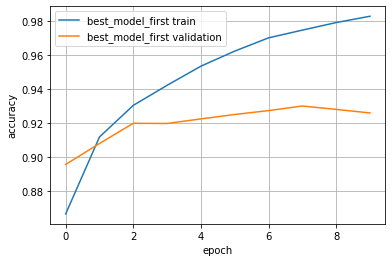

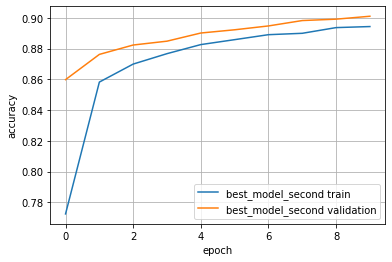

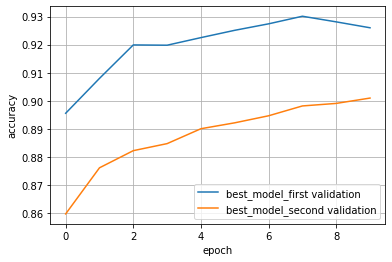

In [57]:
# Visualizing the learning curves on both models:

plt.plot(train_history.history['accuracy'], label = 'best_model_first train')
plt.plot(train_history.history['val_accuracy'], label = 'best_model_first validation')

plt.legend()
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(train_history2.history['accuracy'], label = 'best_model_second train')
plt.plot(train_history2.history['val_accuracy'], label = 'best_model_second validation')

plt.legend()
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(train_history.history['val_accuracy'], label = 'best_model_first validation')
plt.plot(train_history2.history['val_accuracy'], label = 'best_model_second validation')

plt.legend()
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# Optional - The Best model:

Try different networks and parameters and create the most accurate model.

In [58]:
# Reloading the Fashion Mnist dataset:

(X_train, X_test), (y_train, y_test) = fashion_mnist.load_data()

In [59]:
# Checking the shape of the train and test segments:

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [60]:
# Reshape the dataset to a one dimensional representation:

n_instances = X_train.shape[0]
n_row = X_train.shape[1]
n_col = X_train.shape[2]

n_instances, n_row, n_col

(60000, 28, 28)

In [61]:
# Reshape the dataset:

X_train = X_train.reshape(n_instances, -1)

n_instances = y_train.shape[0]
y_train = y_train.reshape(n_instances, -1)

In [62]:
# Print the new shape:

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [63]:
# Artificially inserting RGB element on the dataset images:

X_train = np.dstack([X_train] * 3)
y_train = np.dstack([y_train] * 3)

In [64]:
# Checking the result from the np.dstack function:

X_train.shape, y_train.shape

((60000, 784, 3), (10000, 784, 3))

In [65]:
# Returning the dimensionality of images to the initial state:

X_train = X_train.reshape(-1, 28, 28, 3)
y_train = y_train.reshape(-1, 28, 28, 3)

In [66]:
# Checking the shape of the newest dataset segments:

X_train.shape, y_train.shape

((60000, 28, 28, 3), (10000, 28, 28, 3))

In [67]:
# Changing the size of the images with, from keras_preprocessing.image import img_to_array, array_to_img:

X_train = np.asarray([img_to_array(array_to_img(im, scale = False).resize((32, 32))) for im in X_train])
y_train = np.asarray([img_to_array(array_to_img(im, scale = False).resize((32, 32))) for im in y_train])

In [68]:
# Checking the final shape of the re-engineered dataset:

X_train.shape, y_train.shape

((60000, 32, 32, 3), (10000, 32, 32, 3))

In [69]:
# Normalize the dataset as preparation for CNN model:

# Changing the type of the instances:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

# Dividing in order to obtain range of values between 0 and 1:
X_train = X_train / 255.0
y_train = y_train/ 255.0

In [70]:
# Create VGG16 pretrained model object:

conv_base = VGG16(weights = 'imagenet', include_top = False, input_shape = (32, 32, 3))

In [71]:
# Print the summary of VGG16:

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [72]:
# Before we compile and train our model, a very important thing to do is to freeze the convolutional base:

# Freeze four convolution blocks: 
for layer in conv_base.layers[:11]:
    layer.trainable = False

# Make sure you have frozen the correct layers:
for i, layer in enumerate(conv_base.layers):
    print(i, layer.name, layer.trainable)

0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 True
12 block4_conv2 True
13 block4_conv3 True
14 block4_pool True
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True


In [73]:
# Create CNN model object with inserted VGG16 trained network:

# Creating the Sequential model:
model3 = models.Sequential()

# Inserting the VGG16 trained network:
model3.add(conv_base)

# Inserting flatten layer:
model3.add(layers.Flatten())

# Inserting dense layer:
model3.add(layers.Dense(256, activation='relu'))

# Final layer:
model3.add(layers.Dense(10, activation='softmax'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 14,848,586
Trainable params: 13,113,098
Non-trainable params: 1,735,488
_________________________________________________________________


In [74]:
# Compiling the CNN model object with inserted VGG16 trained network:

model3.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adamax', metrics = ['accuracy'])

In [75]:
# Setting the model:

path = 'best_model_third.pt'

# ModelCheckpoint monitoring:
callback_1 = ModelCheckpoint(path, monitor = 'val_accuracy', save_best_only = True, mode = 'max', verbose = 1)

In [76]:
# Training the model:

val_data = (y_train, y_test)

train_history3 = model3.fit(X_train, 
                            X_test, 
                            validation_data = val_data, 
                            epochs = 16, 
                            batch_size = 64,
                            callbacks = callback_1)

print('Training Finished')

Epoch 1/16
938/938 [==============================] - 18s 18ms/step - loss: 0.7356 - accuracy: 0.7207 - val_loss: 0.3188 - val_accuracy: 0.8856

Epoch 00001: val_accuracy improved from -inf to 0.88560, saving model to best_model_third.pt
INFO:tensorflow:Assets written to: best_model_third.pt/assets
Epoch 2/16
938/938 [==============================] - 16s 18ms/step - loss: 0.2926 - accuracy: 0.8953 - val_loss: 0.3212 - val_accuracy: 0.8921

Epoch 00002: val_accuracy improved from 0.88560 to 0.89210, saving model to best_model_third.pt
INFO:tensorflow:Assets written to: best_model_third.pt/assets
Epoch 3/16
938/938 [==============================] - 16s 18ms/step - loss: 0.2477 - accuracy: 0.9114 - val_loss: 0.2977 - val_accuracy: 0.8920

Epoch 00003: val_accuracy did not improve from 0.89210
Epoch 4/16
938/938 [==============================] - 16s 18ms/step - loss: 0.2187 - accuracy: 0.9203 - val_loss: 0.2752 - val_accuracy: 0.9029

Epoch 00004: val_accuracy improved from 0.89210 to 0

In [77]:
# Loading the best model 'best_model_second.pt':

m3 = load_model('/content/best_model_third.pt')

In [78]:
# Final evaluation of the model:

score = m3.evaluate(y_train, y_test, verbose = 0)

print('Accuracy: %.2f%%' % (score[1]*100))

Accuracy: 92.59%


In [79]:
# Making predictions with the model:

predictions3 = m3.predict(y_train)

In [80]:
print('Prediction for 10th image is: ', np.argmax(predictions3[9]))

Prediction for 10th image is:  7


In [81]:
print('Actual label for 10th image is: ', y_test[9])

Actual label for 10th image is:  7


In [82]:
# Evaluating 'best_model_third.pt':

print('=====Evaluation Best_Model_Third.pt=====')
print_classification_report(y_test, np.argmax(predictions3, axis = 1), class_names)

=====Evaluation Best_Model_Third.pt=====
Confusion matrix
[[868   1  16  18   3   1  87   0   6   0]
 [  1 985   0  10   0   0   3   0   1   0]
 [ 13   0 888   7  41   0  51   0   0   0]
 [ 11   1  11 929  27   0  19   0   1   1]
 [  1   1  47  30 886   0  35   0   0   0]
 [  0   0   0   0   0 992   0   5   0   3]
 [ 95   1  45  20  59   0 774   0   6   0]
 [  0   0   0   0   0   9   0 982   0   9]
 [  2   0   0   3   1   1   1   1 990   1]
 [  0   0   0   0   0   3   1  31   0 965]]

              precision    recall  f1-score   support

 T-shirt/top       0.88      0.87      0.87      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.88      0.89      0.88      1000
       Dress       0.91      0.93      0.92      1000
        Coat       0.87      0.89      0.88      1000
      Sandal       0.99      0.99      0.99      1000
       Shirt       0.80      0.77      0.79      1000
     Sneaker       0.96      0.98      0.97      1000
         Bag       0.99

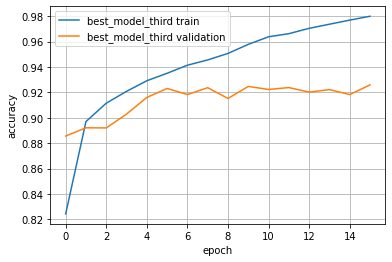

In [83]:
# Visualizing the learning curves of CNN model with transfer learning object nested:

plt.plot(train_history3.history['accuracy'], label = 'best_model_third train')
plt.plot(train_history3.history['val_accuracy'], label = 'best_model_third validation')

plt.legend()
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

## Summary on Transfer Learning:

In our best model we tried to use VGG16 pretrained neural network as nested object in our CNN model. What we expected from this action was increase in accuracy of our model predictions based on the fact that VGG16 is already highly trained neural network. 

- First, that was not the case, with all our attempts to achieve our goal (greater accuracy) we had little success in doing so. To explain, we traid to start as convencional as possible with completely freezes conv_base model, yet we did not manage to increase our accuracy, moreover the model loss on accuracy by 1,5 % taking in consideration our less accurate model.

- Next, we unfreeze layer No. 5 from our conv_base model in order to try and train this segment on our training dataset in order to intervene in summarization stage of conv base model. But our accuracy moved a nich up that is 1%, again far from where we expected to be with this setting.

- Finally, we unfreeze layer No. 4 and 5 from our conv_base model and we increase the number of epochs to 16 and what we manage to get is 93% accuracy which we have already achieved with our first model.

Overall, that are more options to be explore here with this setting of VGG16, but safest bet is to change the transfer learning model with different pretrained neural network, although that is not the goal of this workshop.  